In [68]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

## Szybki podgląd przykładowych obrazów (real vs. generated)

In [87]:
generated_patient ="/home/kamkal/scratch/diffusion-ct/diff_model_gen/ct_400_data_134_1/sample_1.nii.gz"
generated_patient_img = nib.load(generated_patient)
generated_patient_data = generated_patient_img.get_fdata()

real_patient ="/sekhemet/scratch/kamkal/Augm/data_v2_prostate_32slices_34_plus_63/P5.nii.gz"
real_patient_img = nib.load(real_patient)
real_patient_data = real_patient_img.get_fdata()

In [96]:
print(real_patient_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512  32   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.976562  0.976562  2.5       1.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 250.0
qoffset_y       : 250.0
qoffset_z       : 160.

In [89]:
print(dict(generated_patient_img.header)["pixdim"])

[1. 1. 1. 1. 1. 1. 1. 1.]


In [90]:
print(generated_patient_data.min(), generated_patient_data.max())

0.16570743918418884 1.0


In [91]:
def window_scale_intensity_range(volume, win_lev, win_wid):
    a_min = win_lev - win_wid / 2
    a_max = win_lev + win_wid / 2

    # 1. przycięcie do zakresu okna
    vol = np.clip(volume, a_min, a_max)

    # 2. normalizacja do [0,1]
    vol = (vol - a_min) / (a_max - a_min)

    return vol.astype(np.float32)

In [92]:
print(real_patient_data.min(), real_patient_data.max())
real_patient_data_windowed = window_scale_intensity_range(real_patient_data, win_lev=60, win_wid=400)
print(real_patient_data_windowed.min(), real_patient_data_windowed.max())

-1000.0 3071.0
0.0 1.0


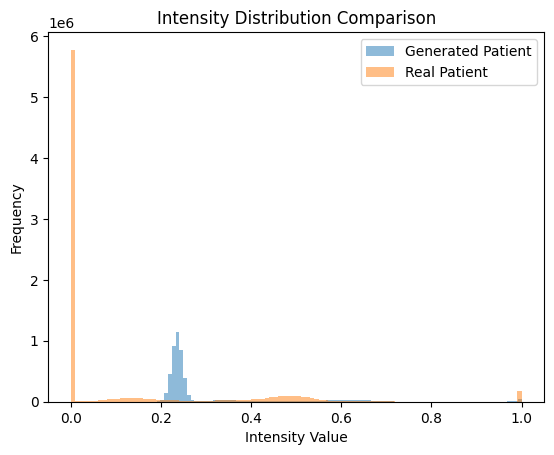

In [93]:
plt.hist(generated_patient_data.ravel(), bins=100, alpha=0.5, label='Generated Patient')
plt.hist(real_patient_data_windowed.ravel(), bins=100, alpha=0.5, label='Real Patient')
plt.title('Intensity Distribution Comparison')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

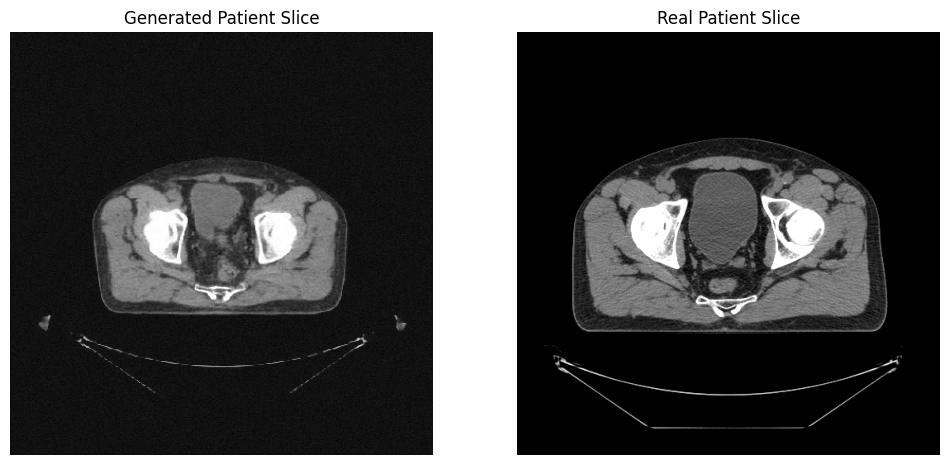

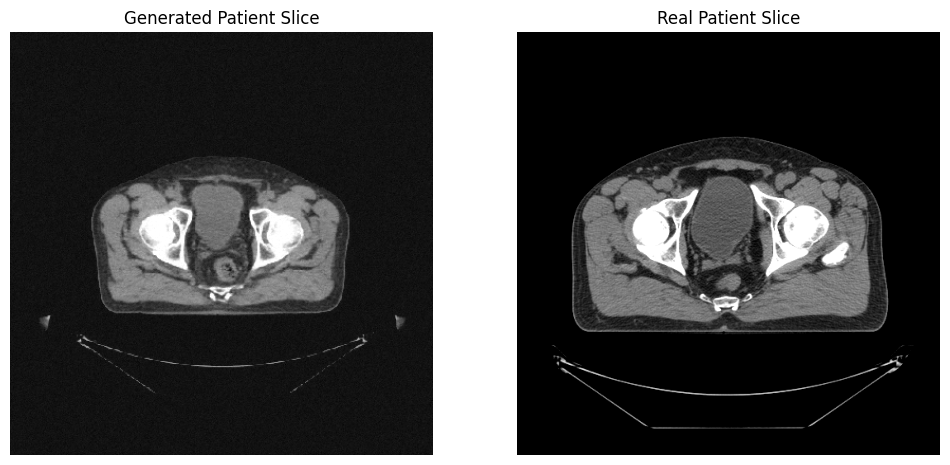

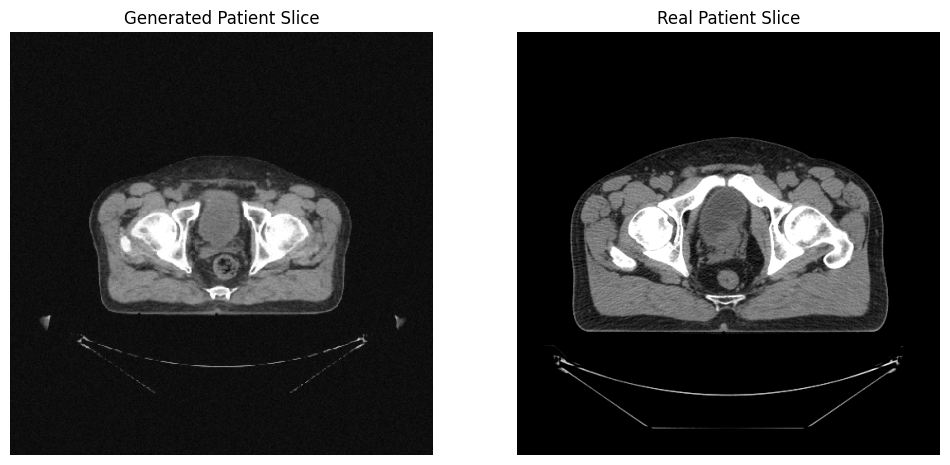

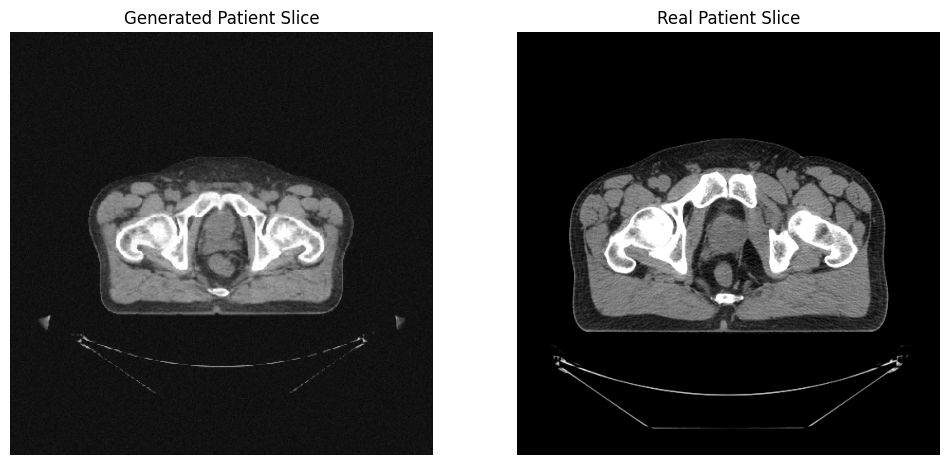

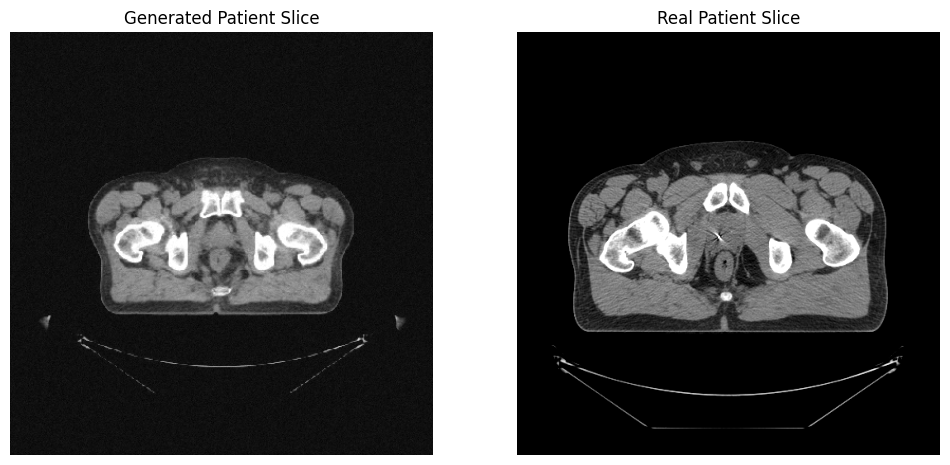

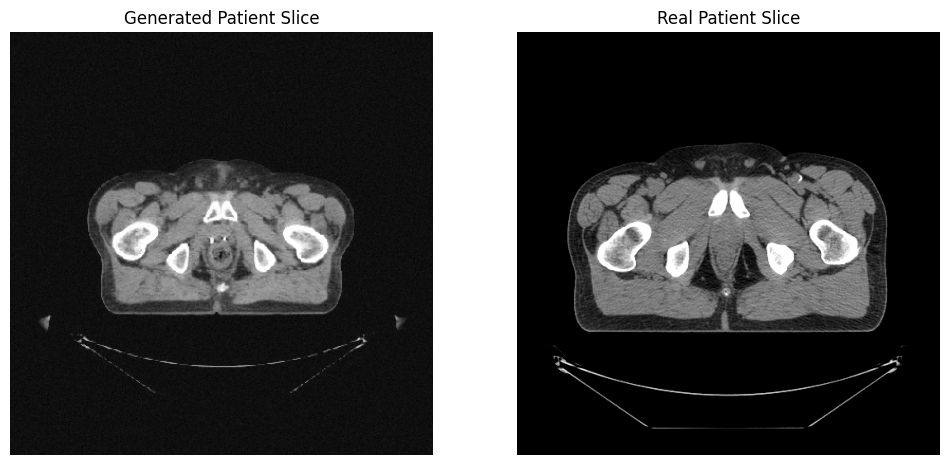

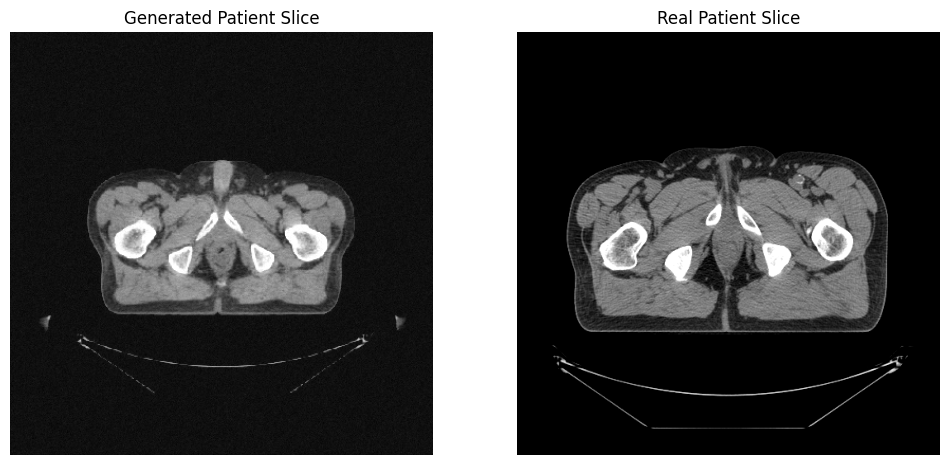

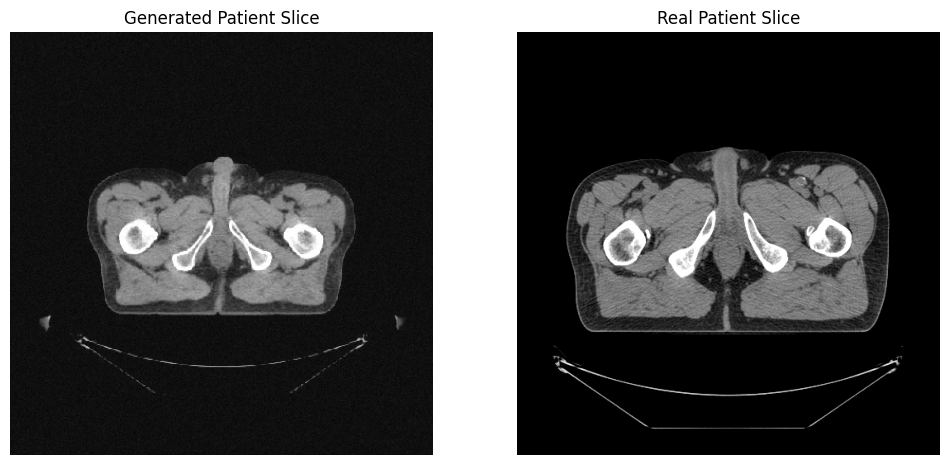

In [95]:
for i in range(0,32,4):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(generated_patient_data[i, :, :], cmap='gray')
    ax1.set_title('Generated Patient Slice')
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(real_patient_data_windowed[:, :, i], cmap='gray')
    ax2.set_title('Real Patient Slice')
    ax2.axis('off')

## Analiza porównawcza

In [ ]:
class CompareMedicalImages:
    def __init__(self, volumes_list):
        self.volumes_list = volumes_list

    def plot_pair_plots():
        """Plot pairwise comparisons of medical image volumes histograms."""
        pass

    def plot_heatmap():
        """Plot heatmap of similarity metrics between medical image volumes."""
        pass

    def compute_similarity_metrics():
        """Compute similarity metrics between medical image volumes.
        Calculate list of metrics for each pair of volumes in volumes_list."""
        pass

    def plot_3d_overlays():
        """Plot 3D overlays of medical image volumes for visual comparison."""
        pass

    def plot_boxplots_of_metrics():
        """Plot boxplots of similarity metrics across all volume pairs."""
        pass

    def compare_similarity(volume1, volume2):
        pass


class CompareMedicalImagesAndMasks(CompareMedicalImages):
    def __init__(self, volumes_list, masks_list):
        super().__init__(volumes_list)
        self.masks_list = masks_list



### Analiza podobieństwa pośród obrazów prawdziwych

### Analiza podobieństwa pośród obrazów wygenerowanych 

### Analiza podobieństwa obrazów wygenerowanych vs. obrazy prawdziwe


### Podsumowanie: Pojedyncza metryka "poprawności" wygenerowanych sampli 
Zawsze w odniesieniu do real data?

## Automatyczna Segmentacja przy użyciu TotalSegmentor

### Automatyczna Segmentacja danych prawdziwych

### Automatyczna Segmentacja danych wygenerowanych

### Porównanie i podsumowanie


## Obrazy + Maski - analiza wyników

## Automatyczna Segmentacja przy użyciu wytrenowanego modelu

### Trenowane tylko na danych prawdziwych: analiza wyników

### Trenowane tylko na danych prawdziwych + danych wygenerowanych - analiza wyników

Pipeline Analizy 
0. naprawić zakres wartości (odwrotność okna w preprocessingu) -> niemożliwe
0. poprawny zapis do nifti, hardcoded pixdim (1mm, 1mm, 2.5mm) i tak dalej, żeby dało się otworzyć w DICOM slicer (RAS?). Przykładowy header danych prawdziwych:
0. próba wygenerowania bardziej różnorodnych obrazów
1. porównanie obrazów (różnica, metryki (GPR, Mettes Mutual Information, itd)
2. porównanie histogramów
3. znalezienie przykładu spośród real data, dla którego wygenerowany jest najbardziej podobny
4. wyświetlenie w DICOM viewer/napari
5. użycie TotalSegmentor (i docelowo "CustomSegmentor") - porównanie wyników real/generated, probability itd.


Trenowania, DM
0. Obrazy + maski
1. Pełny HU (zakresy wartości jako condition(?))
2. Trening na pełna rozdzielczość, większy batch-size?, pełny HU
2. Większy zakres scan depth (cały?)
3. Znowu obraz + maska


Trenowanie segmentacji z augm. zbiorem
...